## Understanding Bias & Variance - Part 1

When we build models and make predictions, all models tends to make some error. There is no model which can make prefect predictions. Then can we control these errors that models tend to make? To answer this, we need to understand the compositions of these errors that model make. 

Prediction errors can be decomposed into two components called error due to **bias** and error due to **variance**. No model can minimize, both bias and variance. So while building models, we always have to trade-off between these two errors: bias and variance. Understanding these two types of errors are key to diagnosing model results and avoid building over- or under-fitting models.

What we will do in this tutorial is take simple case of dataset and try creating underfit and overfit models and understand how errors change based on the complexity of the models. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
curve = pd.read_csv( "curve.csv" )

In [4]:
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


In [7]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

### Fit a simple regression line

Building a simple regression line. It is assumed that the y is linearly dependent on x. 


$$y=\beta _{1}x_{1}+\varepsilon _{i}$$

In [8]:
def fit_poly( degree ):
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    sn.regplot( curve.x, curve.y, fit_reg = False )
    return plt.plot( curve.x, curve.fit, label='fit' )

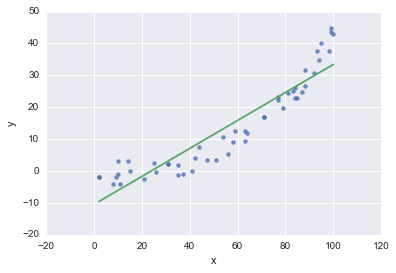

In [9]:
fit_poly( 1 ) 

#### Note:

The regression line does not seem to fit the data. The model assumes that relationship betweeb *y* and *x* is linear. These models are called highly biased model. These kind of models assume simplicity and do not explain variance in the data well.

### Fit a regression with polynomial features

Let's bring in another variable which is square of the feature *x*

$$y=\beta _{1}x_{1}+\beta _{2}x_{1}^2+\varepsilon _{i}$$

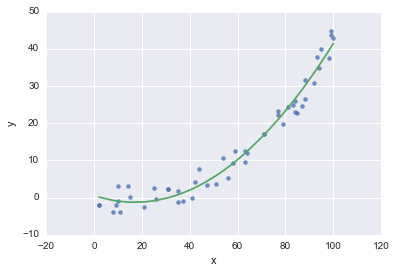

In [10]:
fit_poly( 2 )

#### Note:

The regression line seems to fit data better than the previous line. But we we better this model by adding more polynomial features.

### Building higher polynomial models 

$$y=\beta _{1}x_{1}+\beta _{2}x_{1}^2+\beta _{2}x_{1}^3+\beta _{2}x_{1}^4+\beta _{2}x_{1}^5+\varepsilon _{i}$$

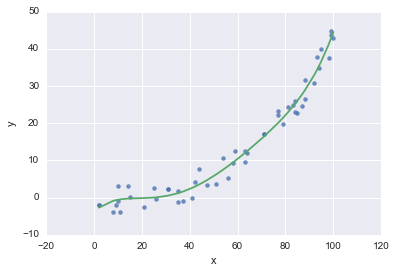

In [11]:
fit_poly( 5 )

$$y=\beta _{1}x_{1}+\beta _{2}x_{1}^2+\beta _{2}x_{1}^3+\beta _{2}x_{1}^4+\beta _{2}x_{1}^5
+\beta _{2}x_{1}^6+\beta _{2}x_{1}^7+\beta _{2}x_{1}^8+\beta _{2}x_{1}^9+\beta _{2}x_{1}^{10}+\varepsilon _{i}$$

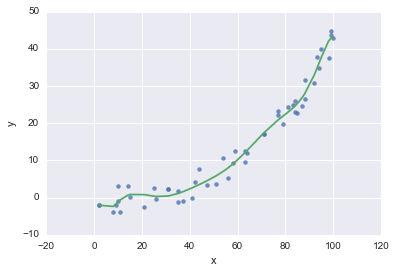

In [12]:
fit_poly( 10 )

#### Note:

As we continue to build higher polynomial models, we realize that the model has started to fit the training data. This can be a case of overfitting. These kind of models are called high variance models. These models are very sensitive to the training data i.e. the model parameters estimated are very sensitive to the data points. Any change i.e. addition and removel of data points can alter these models parameters significantly. High variance models tends to overfit the dataset and do not generalize well.

## Deciding the complexity of the model

Then how complex model should be build. We should split our dataset into train and test, and then build models with increasting complexity to monitor underfitting and overfitting. If the model can be explain train and test dataset both, then it is a high biased models (underfitting). If the model explain train dataset well but does not explain test dataset, then it is a high variance model (overfitting). There should be models in between which explain train as well as test datasets.

In [14]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [15]:
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )

### Split data into train and test datasets

In [100]:
train_X, test_X, train_y, test_y = train_test_split( curve.x, 
                                                    curve.y, 
                                                    test_size = 0.40, 
                                                    random_state = 100 )

### Build model with increasing complexity and measure train and test errors

In [101]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

for i in range( 1, 15 ):
    p = np.polyfit( train_X, train_y, deg = i )
    rmse_df.loc[i-1] = [ i, 
                        get_rmse( train_y, np.polyval( p, train_X ) ),
                        get_rmse( test_y, np.polyval( p, test_X ) ) ]

### Train and testt error vs. degrees of polynomial features in the model

In [102]:
rmse_df

,degree,rmse_train,rmse_test
0,1,5.226638,5.779652
1,2,2.394509,2.755286
2,3,2.233547,2.560184
3,4,2.231998,2.549205
4,5,2.197528,2.428728
5,6,2.062201,2.703880
6,7,2.039408,2.909237
7,8,1.995852,3.270892
8,9,1.979322,3.120420
9,10,1.976326,3.115875


### Plot both train and test errors agaist model complexity

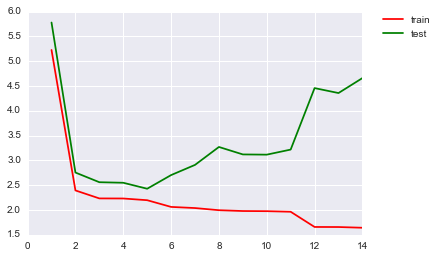

In [103]:
plt.plot( rmse_df.degree, 
         rmse_df.rmse_train, 
         label='train', 
         color = 'r' )

plt.plot( rmse_df.degree, 
         rmse_df.rmse_test, 
         label='test', 
         color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2,
           borderaxespad=0.)

#### Note:

It can be observed that as model complexity increases, initially the models can fit to train and test data well. But beyond a certain point (model complexity level), the train error continue to reduce, but the test error starts increasing. This is point where the model start to overfit the data. So, here the **Optimal model complexity** that should be build to explain the variance is 5. 

We will discuss in the next blog posts, some advanced concepts like bringing down the variance in higher complexity models using ensemble methods like bagging.